In [1]:
import pandas as pd
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins = penguins.dropna()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


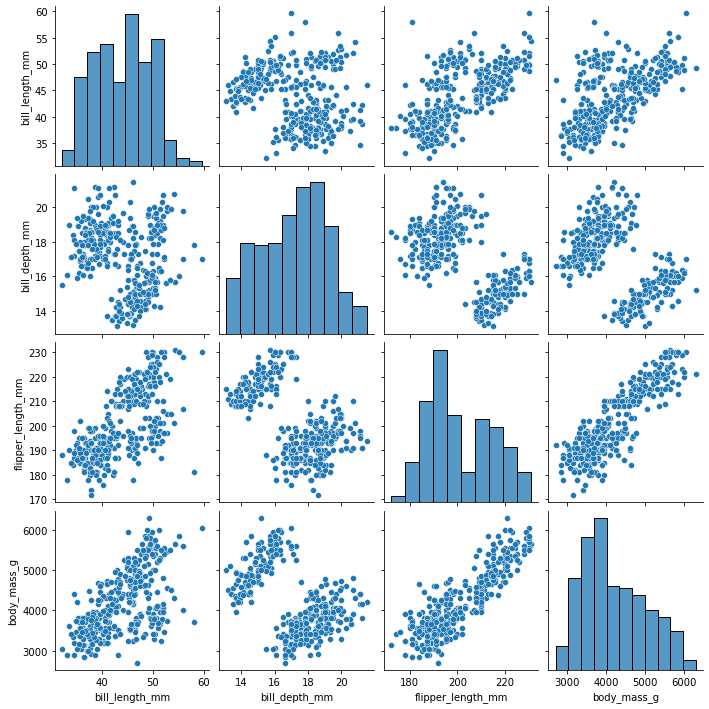

In [5]:
sns.pairplot(penguins)

## Als ik zo kijk denk ik aan 2 clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

## Hier heb ik als parameter 2 clusters meegegeven.

In [8]:
penguins['cluster'] = km.predict(penguins[features])

In [9]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


je ziet hier ook een cluster rij

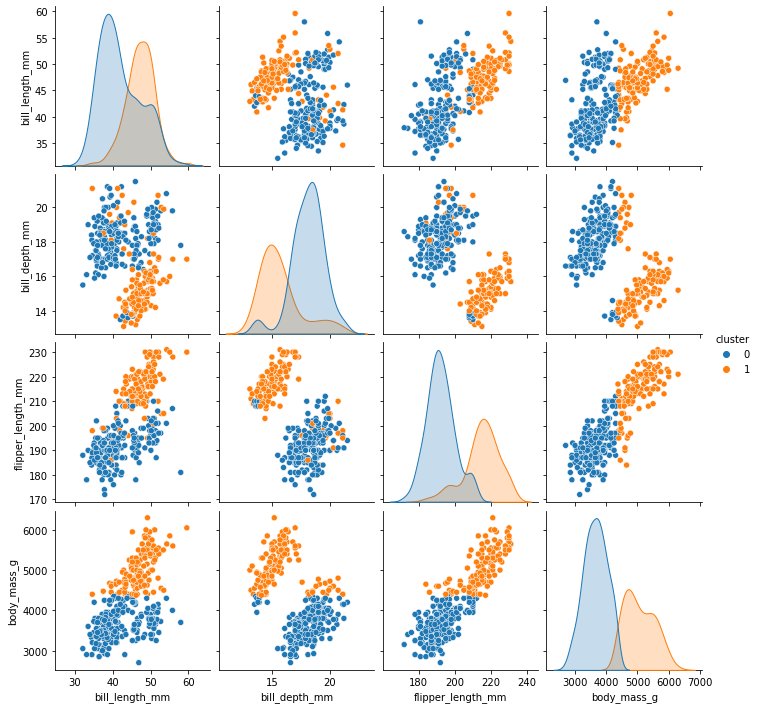

In [10]:
sns.pairplot(penguins, hue="cluster")

pairplot plot alle combinaties

In [11]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [12]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

## kijk bij 3 clusters wat de Silhouette Coefficient is

In [13]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=3, random_state=42).fit(penguins[features])

In [14]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.5653131570232379

In [15]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

## het word lager, dit moet zo dichtbij mogelijk de 1 zitten. 2 clusters is dus waarschijnlijk het beste. want deze komt het dichtsbij bij het nummer 1.

we kunnen ook kijken met island of het een beetje gelijk is.

In [16]:
#sns.pairplot(penguins, hue="island")

In [17]:
contingency_table = penguins.groupby(['island','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
island,,
Biscoe,48,115
Dream,113,10
Torgersen,42,5


## plot de species

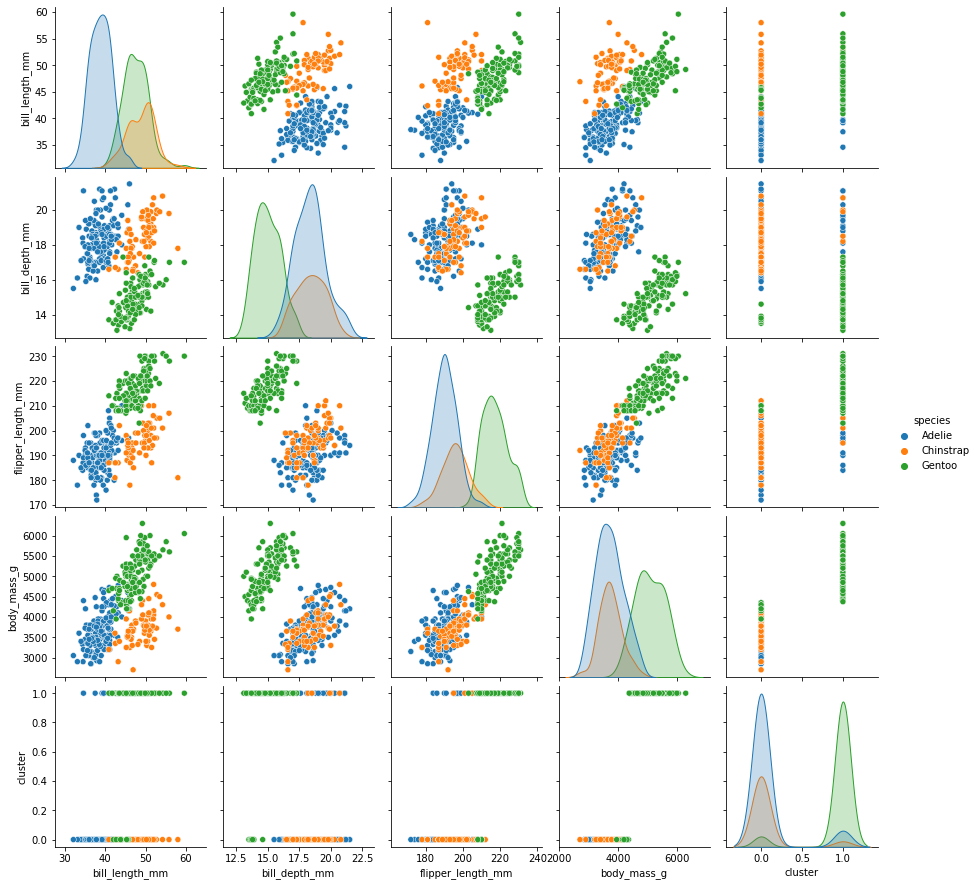

In [18]:
sns.pairplot(penguins, hue="species")

In [19]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,132,14
Chinstrap,63,5
Gentoo,8,111


## sommige species zijn in dezelfde cluster gekomen. Bijvoorbeeld Gentoo is hetzelfde als de cluster bij sommige . 

## als alles hetzelfde zou zijn dan zou dit betekenen dat de clusters hetzelfde zijn als de species

## er is geen verband tussen species en de clusters